# Méthode des moindres carrés

La méthode des moindres carrés, indépendamment élaborée par Legendre et Gauss au début du XIXe siècle, permet de comparer des données expérimentales, généralement entachées d’erreurs de mesure, à un modèle mathématique censé décrire ces données. 

* Régression linéaire : 
l'utilisation de la régression linéaire se rencontre par exemple lorsque l'on veut étalonner un appareil de mesure simple dont la loi de comportement est linéaire.

On veut minimiser la variance par rapport à a et b :
$$ \sigma^2 =\sum_{i=0}^{N-1} (y_i-a x_i -b)^2$$

En notant  $u=\left(
\begin{array}{c}
a \\ b
\end{array}
\right)
$
et $y=\left(
\begin{array}{c c}
y_{0} \\
y_{1} \\
\vdots\\
y_{N-1} \\
\end{array}
\right)
$
et en introduisant $A=\left(
\begin{array}{c c}
x_{0}   & 1  \\
x_{1}   & 1  \\
\vdots  & \vdots \\
x_{N-1}   & 1  \\
\end{array}
\right)$

La variance s'écrit : $ (u^t A^t -b) (b-A u) $. La minimisation de la variation par rapport à $u$ donne :
$\delta u^t A^t (b-Au) =0 $. 

La variable $u$ doit vérifier le système d'équations linéaires :
$A^t A u = A^t b$


[[ 2.85  4.5 ]
 [ 4.5  10.  ]]   <class 'numpy.ndarray'>
[3.06246565 5.09654158]   <class 'numpy.ndarray'>   (2,)


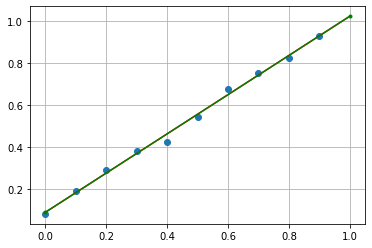

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def f(coeff, x, y):
    d=(y-coeff[0]*x-coeff[1])
    return d

x=np.linspace(0, 1, 10, endpoint=False) 
y=x.copy()+np.random.rand(x.shape[0])*0.1

plt.figure()
plt.plot(x, y, 'o')
guest=(0, 0)

res = optimize.leastsq(f, guest, args=(x, y))

xfit=np.linspace(0, 1, 2, endpoint=True) 
yfit=res[0][0]*xfit+res[0][1]
plt.plot(xfit, yfit, 'r-')


# Approche implementation moindre carrée sous forme syslin
un=np.ones_like(x)
A=np.vstack((x, un))

R=A.dot(A.T)
#print(R.shape)
b=A.dot(y)

print(R, ' ', type(R))
print(b, ' ', type(b), ' ', b.shape)
coeff=np.linalg.solve(R, b)
yfit2=coeff[0]*xfit+coeff[1]
plt.plot(xfit, yfit2, 'g.-')
plt.grid()
plt.show()

In [75]:
print(coeff)

[ 1.02018134  0.02995163]


In [76]:
print(res)

(array([ 1.02018134,  0.02995163]), 3)


[10.03525089  1.00396292]
[[0.00298824 0.00039861]
 [0.00039861 0.00015951]]


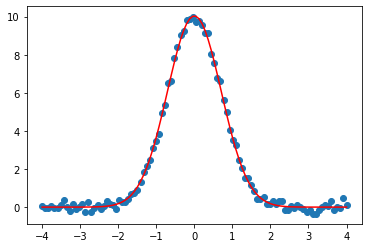

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, b):
    return a * np.exp(-b * x**2)

rng = np.random.default_rng()

x = np.linspace(-4, 4, 100)
ynoise = 0.2 * rng.normal(size=x.size)
y = 10*np.exp(-x**2) + ynoise

popt, pcov = curve_fit(func, x, y)
print(popt)
print(pcov)

plt.figure()
plt.plot(x, y, 'o')

xfit=x;
yfit=func(xfit, popt[0], popt[1])
plt.plot(xfit, yfit, 'r-')
